# Supervised Learning: Regression & Classification

In this week's workshop, we will learn about `supervised machine learning` wherein an annotated data having input-output pair is given to us to train machine learning model. The trained model then can be used to make predictions on `unsee` data (or test set).

### Dataset Description

You are given `houses_portland.csv` file which contains columns for `area of a house`, `number of bedrooms in a house`, and `price`. The goal is to build model which can predict `price of a house` given `number of bedrooms` and `area`. First we will load dataset and find relationship between variables.

In [66]:
# Import the commonly-used modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# Load the dataset
data = pd.read_csv("houses_portland.csv")
print("data size: "+str(data.shape))
data.head()

data size: (47, 3)


,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Task 1: Ordinary linear regression model on one-dimensional feature/variable

### Let's show a demo first

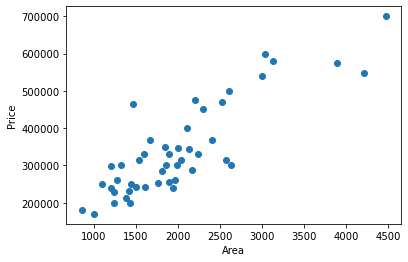

In [68]:
# Visually explore the relationship between "area" and "price"
X = data['area'].values
y = data['price'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Split data into `train` and `test` using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from sklearn library.

In [69]:
# Split data
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
X_train = np.reshape(X_train, (-1, 1))  # change from 1D array to 2D array
X_test = np.reshape(X_test, (-1, 1))
print("training data feature shape:", X_train.shape)
print("training data label shape:", y_train.shape)
print("test data feature space shape:", X_test.shape)
print("test data label shape:", y_test.shape)

training data feature shape: (37, 1)
training data label shape: (37,)
test data feature space shape: (10, 1)
test data label shape: (10,)


Looking at the shape of train and test sets, we can say that out of total 47 samples, 37 samples are in training and the remaining 10 samples are in test. Look at the documentation of `train_test_split` function to find out whether data is shuffled or not during the split operation.

### Model Development (or model training)

In [70]:
# Build linear regression model
from sklearn import linear_model as lm
ordinaryLRmodel = lm.LinearRegression()
ordinaryLRmodel.fit(X_train, y_train)

LinearRegression()

In [71]:
# Print the coefficients
print("coefficient:", ordinaryLRmodel.coef_)
print("intercept:", ordinaryLRmodel.intercept_)

coefficient: [131.18332435]
intercept: 73926.39036190775


What is an Intercept? How you define coefficient?

### Plotting regression line

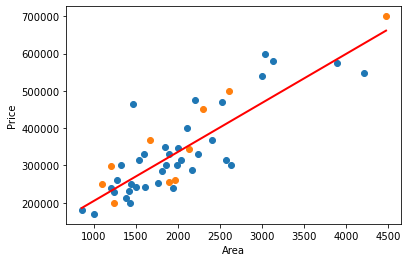

In [72]:
# Plot the model
x_line=[X.min(), X.max()]
y_line=[ordinaryLRmodel.intercept_+ordinaryLRmodel.coef_*X.min(), ordinaryLRmodel.intercept_+ordinaryLRmodel.coef_*X.max()]
plt.plot(x_line, y_line, 'r', lw=2)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Model Evaluation (on test set)

In [73]:
# Prediction/Testing
y_pred = ordinaryLRmodel.predict(X_test)
y_pred

array([236068.97925658, 321600.50673176, 331308.07273355, 375648.03636332,
       416183.68358699, 218228.04714519, 353609.23787278, 231346.37958004,
       661365.31679422, 292215.44207771])

Refer to https://en.wikipedia.org/wiki/Coefficient_of_determination for more details about coefficient of determination $r^2$

In [74]:
# Performance metrics
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))

Mean squared error: 3633962866.61
Coefficient of determination: 0.82


In [31]:
#Mean square error(MSE) should be as low as possible . 
#Larger the MSE value means large error.
#If the coefficient is 0.84, then 84% of the points should fall within the regression line.
#A higher coefficient is an indicator of a better goodness of fit for the observations.



## Task 2: Ordinary linear regression model on multi-dimensional features/variables

In [91]:
# Data preparation
X = data[['area', 'bedroom']].values
y = data['price'].values


### Split data into training and testing sets

In [92]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=153)
print(" Shape of X_train : ", X_train.shape)
print(" Shape of y_train : ", y_train.shape)
print(" Shape of X_test : ", X_test.shape)
print(" Shape of y_test : ", y_test.shape)

 Shape of X_train :  (32, 2)
 Shape of y_train :  (32,)
 Shape of X_test :  (15, 2)
 Shape of y_test :  (15,)


### Build linear regression model

In [93]:
# Build linear regression model
from sklearn import linear_model as lm
lineareg = lm.LinearRegression()
lineareg.fit(X_train, y_train)


LinearRegression()

### Check model coefficients and comment

In [94]:

# Print the coefficients
print(" The coefficient of model is: ", lineareg.coef_)
print("The intercept of model is: ", lineareg.intercept_)

 The coefficient of model is:  [   122.97122647 -10974.77385746]
The intercept of model is:  127233.51615420575


### Do model predictions on test set

In [95]:
# Prediction/Testing
y_predict = lineareg.predict(X_test)
y_predict

array([369518.79942757, 349198.21235819, 331428.05392245, 334195.72272853,
       623024.79901134, 309908.08928974, 326724.81261509, 452248.10014225,
       456060.20816291, 404934.51265169, 337453.64401961, 246301.63050199,
       327432.30527253, 279411.22512453, 278028.20693193])

### Get model scores in terms of MSE and r^2 scores

In [97]:
# Performance metrics
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('The mean squared error is: %.2f' %mean_squared_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('The coefficient of determination is: %.2f' %r2_score(y_test, y_predict))


The mean squared error is: 4062945336.65
The coefficient of determination is: 0.79


## Task 3: Nearest neighbors based classification

### Data preprocessing

In [38]:
# Import the commonly-used modules
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("titanic.csv")
print("data size: "+str(data.shape))
data.head()

data size: (891, 12)


,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [39]:
# size of the data
print("(row, column):",data.shape)

(row, column): (891, 12)


In [40]:
# check for missing values
data.isnull().sum()

PassengerId      0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass           0
Survived         0
dtype: int64

In [41]:
# one option is to just simply drop rows with any missing values
data_no_missing_value=data.dropna()
print("(row, column) after dropping missing values:\n",data_no_missing_value.shape)

(row, column) after dropping missing values:
 (183, 12)


In [42]:
# get one column from the data
data_name=data_no_missing_value["Name"]
data_name

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                                McCarthy, Mr. Timothy J
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                             Carlsson, Mr. Frans Olof
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 183, dtype: object

In [43]:
# get three columns from the data
data_sex_age_survived=data_no_missing_value[['Sex', 'Age', 'Survived']]
data_sex_age_survived

,Sex,Age,Survived
1,female,38.0,1
3,female,35.0,1
6,male,54.0,0
10,female,4.0,1
11,female,58.0,1
...,...,...,...
871,female,47.0,1
872,male,33.0,0
879,female,56.0,1
887,female,19.0,1


In [44]:
# encode categorical attributes
data_sex_age_survived['Sex']=data_sex_age_survived.Sex.astype('category').cat.codes
data_sex_age_survived

<ipython-input-44-9aac392383e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sex_age_survived['Sex']=data_sex_age_survived.Sex.astype('category').cat.codes


,Sex,Age,Survived
1,0,38.0,1
3,0,35.0,1
6,1,54.0,0
10,0,4.0,1
11,0,58.0,1
...,...,...,...
871,0,47.0,1
872,1,33.0,0
879,0,56.0,1
887,0,19.0,1


### Build model and perform evaluation

In [45]:
# define X and y
feature_columns=['Sex', 'Age']
X=data_sex_age_survived[feature_columns]
y=data_sex_age_survived.Survived
print(X.head())
print(y.head())

    Sex   Age
1     0  38.0
3     0  35.0
6     1  54.0
10    0   4.0
11    0  58.0
1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64


In [46]:
# train/test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
# train a 1-NN classifier
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
# predict the test data
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0])

In [49]:
# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7608695652173914


### Now, let's do the task

In [98]:
# Load the dataset
dt = pd.read_csv("titanic.csv")
print("data size: "+str(data.shape))
dt.head()

data size: (47, 3)


,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [99]:
# delete the attribute "Cabin"
del dt['Cabin']

In [100]:
# fill missing values with the mean age
print("The mean age is: ", dt.Age.mean())



The mean age is:  29.69911764705882


In [101]:
# drop rows with any missing values (the "Embarked" atrribute)
daf = dt.dropna()
print(daf.shape)


(712, 11)


In [102]:
# encode the categorical attributes where applicable
attribute_columns = ['Sex', 'Age', 'Embarked', 'Pclass', 'Fare', 'SibSp', 'Parch']
X=daf[attribute_columns]
y=daf.Survived
print(X.shape)
print(y.shape)
X['Sex'] = X.Sex.astype('category').cat.codes
X['Embarked'] = X.Embarked.astype('category').cat.codes

(712, 7)
(712,)


<ipython-input-102-5bb7744d2ce1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X.Sex.astype('category').cat.codes
<ipython-input-102-5bb7744d2ce1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X.Embarked.astype('category').cat.codes


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(534, 7)
(534,)
(178, 7)
(178,)


In [106]:
# build a 1-NN classification model where "Survived" is the prediction target

from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier(n_neighbors=1)
neig.fit(X_train,y_train)
y_predictions = neig.predict(X_test)
print("The accuracy score on test set: ", metrics.accuracy_score(y_test, y_predictions))

The accuracy score on test set:  0.6797752808988764


### More advanced tasks

The accuracies scores are:  [0.6797752808988764, 0.6741573033707865, 0.6966292134831461, 0.7247191011235955, 0.6910112359550562]


Text(0.5, 1.0, 'Accuracy scores at different n_neighbors values')

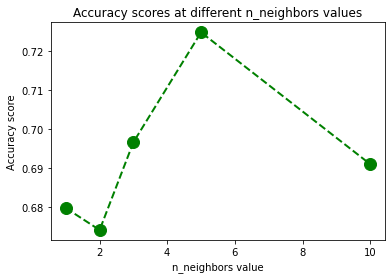

In [108]:
# mannually try other k values, e.g., 2, 3, 5, 10, the accuracy comparison
import matplotlib.pyplot as plt

accuracy = []
n_neighbors_values = [1, 2, 3, 5, 10]
for n_neighbor in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(acc)
print("The accuracies scores are: ", accuracy)
plt.plot(n_neighbors_values, accuracy, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('n_neighbors value')
plt.ylabel('Accuracy score')
plt.title('Accuracy scores at different n_neighbors values')


In [109]:
# use k-fold cross-validation (10-fold cross validation)
from sklearn.model_selection import cross_val_score
estimator = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(estimator, X, y, cv=10, scoring = 'accuracy')
print(scores)
print(" The mean accuracy score for 10-fold CV: ", scores.mean())
print("Std for accuracy score for 10-fold CV: ", scores.std())


[0.65277778 0.625      0.67605634 0.71830986 0.66197183 0.77464789
 0.74647887 0.71830986 0.69014085 0.77464789]
 The mean accuracy score for 10-fold CV:  0.7038341158059467
Std for accuracy score for 10-fold CV:  0.0487852222097963


In [110]:
# Use grid search to faciliate the identification of the best hyper parameter
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [1,2,3,5,7,9,10]}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters,scoring = 'accuracy', cv = 10)
clf.fit(X, y)
print(clf.cv_results_)

{'mean_fit_time': array([0.00467439, 0.00338728, 0.00387356, 0.00404027, 0.00383763,
       0.00366509, 0.00326474]), 'std_fit_time': array([0.00221262, 0.00012953, 0.00066087, 0.00087059, 0.00042238,
       0.0005427 , 0.00021554]), 'mean_score_time': array([0.00623868, 0.00537989, 0.00593059, 0.00636072, 0.00593362,
       0.00585499, 0.00501862]), 'std_score_time': array([0.00159073, 0.00046257, 0.00044648, 0.0004329 , 0.000372  ,
       0.00049278, 0.00017754]), 'param_n_neighbors': masked_array(data=[1, 2, 3, 5, 7, 9, 10],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}, {'n_neighbors': 10}], 'split0_test_score': array([0.65277778, 0.69444444, 0.65277778, 0.63888889, 0.59722222,
       0.59722222, 0.61111111]), 'split1_test_score': array([0.58333333, 0.59722222, 0.625     , 0.6666666

## Task 4: Build a decision tree model for the above classification task

In [111]:

# Importing the model 
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(random_state=142)
# Training the model
dct.fit(X_train, y_train)
# Predicting the test set
y_predict = dct.predict(X_test)
# Finding accuracy score of test set
print("Test set accuracy score: ", metrics.accuracy_score(y_test, y_predict))
# Classification report of the test set
print(metrics.classification_report(y_test, y_predict))

Test set accuracy score:  0.7528089887640449
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       105
           1       0.73      0.63      0.68        73

    accuracy                           0.75       178
   macro avg       0.75      0.73      0.74       178
weighted avg       0.75      0.75      0.75       178

